# Capstone Project - The Battle of Neighborhoods
 
## Suitable new store locations in Buenos Aires for a Sportwear Retailer

This notebook contains:

- A description of the problem and a discussion of the background - Week 1
- A description of the data and how it will be used to solve the problem - Week 1
- Methodology and Exploratory Data Analysis - Week 2
-  Inferences and Discussion - Week 2

The seperate report goes into more decription of the methodology. 
This notebook gives only brief outlines of the methodology of each step, but includes all the code, dataframes and visualisations.

## 1 Introduction and Discussion of the Business Objective and Problem
### Locations for new Sportweare stores branch in Buenos Aires, Argentina
#### The Task At Hand

A foreign investor is willing to open a new store selling sportswear in Buenos Aires. It has stores in the main cities of the world and has no greater knowledge of the mentioned city.
For this reason, contact our study that has extensive knowledge in the field of data science.
The result of our advice will be to indicate which are the neighborhoods of Buenos Aires with the greatest potential to open this new branch.
This will be an important part of your decision-making process, the other will be the qualitative analysis of the neighborhoods once these data and reports are reviewed and studied.
The neighborhoods to be considered will be those in which there are public and private spaces for physical activities and with fewer stores selling sportswear.
Foursquare data will be very useful for making decisions based on data on the best of those areas. This database is considered to have updated data.

#### Criteria

Based on our qualitative data, we suggest that the best locations to open a new branch are places near recreational areas such as sports clubs, 
gyms, public squares in general sports training places.
The analysis and recommendations will focus on the neighborhoods with the highest amount of the class of establishments mentioned.
Limiting the number of neighborhoods will allow us to carry out further research, such as finding specific sites for the installation of the 
new branch.

#### Why Data?

Taking advantage of the ability of data science, investors can save countless hours of analysis for each neighborhood, consulting many real 
estate agents with their respective costs and perhaps making a wrong decision.
Data will provide better answers and better solutions to their task at hand.

#### Outcomes

The objective is to identify the best neighborhoods to open a new branch as part of the company's plan.
The results will be translated to the administration in a simple way that will transmit the data-based analysis to the best locations to open 
the store.


## 2 The Data Science Workflow

### Data Requirements

The main neighborhoods in Buenos Aires are divided into "Comunas" (administrative areas).
The data regarding the neighborhoods needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.
The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare neighborhoods, identifying the high traffic areas where consumers go for Soccer Stadium, Gym, Athletics & Sports, Fitness Center and Outdoors & Recreation are most interested in opening new store.

#### The Data Science Workflow for Part 1 & 2 includes the following:

Outline the initial data that is required:
Neighborhoods  data for Buenos Aires including names, location data if available, and any other details required.

Obtain the Data:
- Research and find suitable sources for the neighborhoods data for Buenos Aires.
- Access and explore the data to determine if it can be manipulated for our purposes.

Initial Data Wrangling and Cleaning:
- Clean the data and convert to a useable form as a dataframe.

#### The Data Science Workflow for parts 3 & 4 includes:

Data Analysis and Location Data:
-  Foursquare location data will be leveraged to explore or compare neighborhoods around Buenos Aires.
- Data manipulation and analysis to derive subsets of the initial data.
- Identifying the high traffic areas using data visualisation and tatistical nalysis.

Visualization:
- Analysis and plotting visualizations.
- Data visualization using various mapping libraries.

Discussion and Conclusions:
- Recomendations and results based on the data analysis.
- Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.
     


#### Install: Folium and Geopy

In [2]:
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done

# All requested packages already installed.



#### Import libraries

In [3]:
import pandas as pd
import geopy.geocoders
from geopy.geocoders import Nominatim
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported.')

Libraries imported.


#### Data Research and Preparation: Import the Buenos Aires Data

In [4]:
!wget -O Listado_barrios.csv https://raw.githubusercontent.com/patriciocgarcia/Coursera_Capstone/master/Listado_barrios_capital_federal_recortado.csv

df = pd.read_csv('Listado_barrios.csv', sep=';')

df = df.rename(columns={'Distrito': 'Comuna'})
df.head(5)


--2020-03-04 19:13:38--  https://raw.githubusercontent.com/patriciocgarcia/Coursera_Capstone/master/Listado_barrios_capital_federal_recortado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856 [text/plain]
Saving to: ‘Listado_barrios.csv’

100%[======================================>] 856         --.-K/s   in 0s      

2020-03-04 19:13:38 (47.1 MB/s) - ‘Listado_barrios.csv’ saved [856/856]



,Comuna,Barrio
0,Comuna 15,Agronomia
1,Comuna 3,Balvanera
2,Comuna 13,Belgrano
3,Comuna 6,Caballito
4,Comuna 15,Chacarita


In [5]:
barrio = 'Paternal'
distrito = 'Buenos Aires'
address = barrio + ', ' + distrito

geolocator = Nominatim(user_agent="ba_explorer")
geopy.geocoders.options.default_timeout=7
location = geolocator.geocode(barrio,distrito)
#location

latitude = location.latitude
longitude = location.longitude

print ('Address', address)
print('The geograpical coordinate func {}, {}.'.format(location.latitude, location.longitude))


Address Paternal, Buenos Aires
The geograpical coordinate func -34.5977397, -58.4701995.


In [6]:
#Define a function

def find_location(borough,neighborhood):
    try:
        geolocator = Nominatim(user_agent="ba_explorer")
        geopy.geocoders.options.default_timeout = 7
        location = geolocator.geocode(borough,neighborhood)
        location
        
        address = neighborhood + ', ' + borough
        print ('Address', address)
        print('The geograpical coordinate func {}, {}.'.format(location.latitude, location.longitude))
        
        return [location.latitude, location.longitude] 
     
    except Nominatim:
        return find_location(borough,neighborhood)


In [7]:
#Using the function

borough = 'Buenos Aires'
neighborhood = 'Congreso'
address = neighborhood + ', ' + borough

find_location(borough,neighborhood)
print ('Address', address)
print('The geograpical coordinate call {}, {}.'.format(location.latitude, location.longitude))


Address Congreso, Buenos Aires
The geograpical coordinate func -34.6075682, -58.4370894.
Address Congreso, Buenos Aires
The geograpical coordinate call -34.5977397, -58.4701995.


#### Exploring, Wrangling and Cleaning the Data

In [9]:
# Declare a list that is to be converted into a column 
barrios = df

barrios = pd.DataFrame(columns=['Comuna','Barrio','Latitud','Longitud'])


for comuna, barrio in zip(df['Comuna'], df['Barrio']):
    distrito = 'Buenos Aires'
    geolocator = Nominatim(user_agent="ba_explorer")
    geopy.geocoders.options.default_timeout=7
    location = geolocator.geocode(barrio,distrito)
    #print ('Address', barrio)
    #print('The geograpical coordinate func {}, {}.'.format(location.latitude, location.longitude))
    
    #barrios['Latitud'] = location.latitude
    #barrios['Longitud'] = location.longitude
     
    barrios = barrios.append({'Comuna': comuna, 'Barrio': barrio, 'Latitud': location.latitude, 'Longitud': location.longitude}, ignore_index=True)    
    #print (barrio[0])    
    #barrios.loc[barrios.index, 'Latitud'] = latitude
    #barrios.loc[barrios.index, 'Longitud'] = 2

barrios.head(barrios.shape[0])


,Comuna,Barrio,Latitud,Longitud
0,Comuna 15,Agronomia,-34.591516,-58.485385
1,Comuna 3,Balvanera,-34.609215,-58.403140
2,Comuna 13,Belgrano,-34.561308,-58.456545
3,Comuna 6,Caballito,-34.620077,-58.442489
4,Comuna 15,Chacarita,-34.588011,-58.454156
5,Comuna 12,Coghlan,-34.559910,-58.474714
6,Comuna 13,Colegiales,-34.574515,-58.452282
7,Comuna 1,Constitucion,-35.331831,-72.411900
8,Comuna 15,La Paternal,-34.597740,-58.470199
9,Comuna 9,Mataderos,-34.657863,-58.501762


In [11]:
#Obtain cordenates for Buenos Aires

borough = 'Buenos Aires'
neighborhood = ' '
address = neighborhood + ', ' + borough

find_location(borough,neighborhood)
print('The geograpical coordinate {}, {}.'.format(latitude, longitude))
latitud_ba = latitude
longitud_ba = longitude


Address  , Buenos Aires
The geograpical coordinate func -34.6075682, -58.4370894.
The geograpical coordinate -34.5977397, -58.4701995.


### Week 1:
#### Discussion of the Business Objective and Problem / The Data Workflow

We now have located and imported the relevant data for the neighborhoods of Buenos Aires, and have constructed a dataframe.
Our business objective, strategy and methods to achieve our goal have been laid out, and a data workflow established.
Next up, we will leverage Foursquare location data to identify the high traffic areas where consumers go for Soccer Stadium, Gym, 
Athletics & Sports, Fitness Center and Outdoors & Recreation are most interested in opening new store.

#### The Battle of Neighborhoods continues in the next section.


### Week 2 - Data Analysis

#### Methodology and Exploratory Data Analysis

##### The Data Science Workflow for parts 3 & 4 includes:


- Data Analysis and Location Data:
- Foursquare location data will be leveraged to explore or compare districts around Paris.
- Data manipulation and analysis to derive subsets of the initial data.
- Identifying the high traffic areas using data visualisation and tatistical nalysis.

Visualization:
- Analysis and plotting visualizations.
- Data visualization using various mapping libraries.

Discussion and Conclusions:
- Recomendations and results based on the data analysis.
- Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.


#### Use the geopy library to get the latitude and longitude values of Buenos Aires

#### Create a map of Buenos Aires, Argentina with districts superimposed

In [12]:
#latitude = -34.6075682  - validacion coordenadas B.A. 
#longitude = -58.4370894
map_buenos_aires = folium.Map(location=[latitud_ba, longitud_ba], zoom_start=11)

# add markers to map
for lat, lng, distrito, barrio in zip(barrios['Latitud'], barrios['Longitud'], barrios['Comuna'], barrios['Barrio']):
    
    label = '{}, {}'.format(barrio, distrito)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_buenos_aires)  
    
map_buenos_aires


#### Use the Foursquare API to explore the neighborhoods of Buenos Aires

In [13]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'EHQ0XO0DXL0NMXPG5G5IA04N2VPXBXKAOFM1OKL3HTP3ZVGC' # your Foursquare ID
CLIENT_SECRET = 'JHGH5T52ETR0CEKXU4CFZMUSG2GUANSQJQKH4TMDAMYLUW12' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: EHQ0XO0DXL0NMXPG5G5IA04N2VPXBXKAOFM1OKL3HTP3ZVGC
CLIENT_SECRET:JHGH5T52ETR0CEKXU4CFZMUSG2GUANSQJQKH4TMDAMYLUW12


In [14]:
# Get the neighborhood's latitude and longitude values.
barrio_latitud = barrios.loc[0, 'Latitud'] # neighborhood latitude value
barrio_longitud = barrios.loc[0, 'Longitud'] # neighborhood longitude value
barrio_name = barrios.loc[0, 'Barrio'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(barrio_name, barrio_latitud, barrio_longitud))


Latitude and longitude values of Agronomia are -34.5915159, -58.4853851.


In [15]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's name.

barrios.loc[0, 'Barrio']


'Agronomia'

In [16]:
# Now, let's get the top 100 venues that are in Agronomia within a radius of 500 meters.
# First, let's create the GET request URL. Name your URL url.

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    barrio_latitud, 
    barrio_longitud, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=EHQ0XO0DXL0NMXPG5G5IA04N2VPXBXKAOFM1OKL3HTP3ZVGC&client_secret=JHGH5T52ETR0CEKXU4CFZMUSG2GUANSQJQKH4TMDAMYLUW12&v=20180605&ll=-34.5915159,-58.4853851&radius=500&limit=100'

In [17]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5e5ffe76b57e88001b4961e2'},
 'response': {'headerLocation': 'Agronomía',
  'headerFullLocation': 'Agronomía, Buenos Aires',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': -34.587015895499995,
    'lng': -58.479928964266804},
   'sw': {'lat': -34.5960159045, 'lng': -58.4908412357332}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55c3e998498ead7075c27a64',
       'name': 'Feria del Productor al Consumidor',
       'location': {'address': 'Facultad de Agronomía (UBA)',
        'lat': -34.59398080307991,
        'lng': -58.483097695654145,
        'labeledLatLngs': [{'label': 'display',
          'lat': -34.59398080307991,
          'lng': -58.483097695654145}],
        'distanc

In [18]:
# From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [19]:
# Now we are ready to clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head(nearby_venues.shape[0])


,name,categories,lat,lng
0,Feria del Productor al Consumidor,Farmers Market,-34.593981,-58.483098
1,Club Arquitectura,Athletics & Sports,-34.589630,-58.484929
2,Vivero Agronomía,Garden Center,-34.591700,-58.488838
3,Social Parrilla,BBQ Joint,-34.588955,-58.484677
4,Corredor Aeróbico de Agronomía,Trail,-34.592877,-58.483940
5,Parada Línea 80,Bus Stop,-34.592044,-58.489767
6,Túnel Gustavo Cerati,Tunnel,-34.592892,-58.490347


In [20]:
# Explore Neighborhoods in Buenos Aires
# Let's create a function to repeat the same process to all the neighborhoods in Manhattan

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Barrio', 
                  'Barrio Latitud', 
                  'Barrio Longitud', 
                  'Venue', 
                  'Venue Latitud', 
                  'Venue Longitud', 
                  'Venue Categoria']
    
    return(nearby_venues)


In [21]:
# Now, run the above function on each neighborhood and create a new dataframe called buenos_aires_venues.
buenos_aires_venues = getNearbyVenues(names=barrios['Barrio'],
                                   latitudes=barrios['Latitud'],
                                   longitudes=barrios['Longitud']
                                  )


Agronomia
Balvanera
Belgrano
Caballito
Chacarita
Coghlan
Colegiales
Constitucion
La Paternal
Mataderos
Monte Castro
Nueva Pompeya
Nunez
Parque Avellaneda
Parque Chacabuco
Parque Chas
Parque Patricios
Puerto Madero
Recoleta
Saavedra
San Nicolas
San Telmo
Velez Sarsfield
Villa Crespo
Villa del Parque
Villa Devoto
Villa Gral. Mitre
Villa Lugano
Villa Luro
Villa Ortuzar
Villa Pueyrredon
Villa Real
Villa Riachuelo
Villa Santa Rita
Villa Soldati
Villa Urquiza


In [22]:
# Let's check the size of the resulting dataframe¶

print(buenos_aires_venues.shape)
buenos_aires_venues.head(buenos_aires_venues.shape[0])


(752, 7)


,Barrio,Barrio Latitud,Barrio Longitud,Venue,Venue Latitud,Venue Longitud,Venue Categoria
0,Agronomia,-34.591516,-58.485385,Feria del Productor al Consumidor,-34.593981,-58.483098,Farmers Market
1,Agronomia,-34.591516,-58.485385,Club Arquitectura,-34.589630,-58.484929,Athletics & Sports
2,Agronomia,-34.591516,-58.485385,Vivero Agronomía,-34.591700,-58.488838,Garden Center
3,Agronomia,-34.591516,-58.485385,Social Parrilla,-34.588955,-58.484677,BBQ Joint
4,Agronomia,-34.591516,-58.485385,Corredor Aeróbico de Agronomía,-34.592877,-58.483940,Trail
5,Agronomia,-34.591516,-58.485385,Parada Línea 80,-34.592044,-58.489767,Bus Stop
6,Agronomia,-34.591516,-58.485385,Túnel Gustavo Cerati,-34.592892,-58.490347,Tunnel
7,Balvanera,-34.609215,-58.403140,Havanna,-34.610158,-58.403358,Café
8,Balvanera,-34.609215,-58.403140,La Posta,-34.610694,-58.398948,Pizza Place
9,Balvanera,-34.609215,-58.403140,Keltia Ximnasio,-34.608757,-58.402582,Gym


In [24]:
#Let's check how many venues were returned for each neighborhood
buenos_aires_venues.groupby('Barrio').count()


,Barrio Latitud,Barrio Longitud,Venue,Venue Latitud,Venue Longitud,Venue Categoria
Barrio,,,,,,
Agronomia,7,7,7,7,7,7
Balvanera,14,14,14,14,14,14
Belgrano,42,42,42,42,42,42
Caballito,42,42,42,42,42,42
Chacarita,22,22,22,22,22,22
Coghlan,15,15,15,15,15,15
Colegiales,31,31,31,31,31,31
Constitucion,8,8,8,8,8,8
La Paternal,4,4,4,4,4,4


In [25]:
# Let's find out how many unique categories can be curated from all the returned venues¶

print('There are {} uniques categories.'.format(len(buenos_aires_venues['Venue Categoria'].unique())))


There are 158 uniques categories.


In [26]:
# Analyze Each Neighborhood
# one hot encoding
buenos_aires_onehot = pd.get_dummies(buenos_aires_venues[['Venue Categoria']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
buenos_aires_onehot['Barrio'] = buenos_aires_venues['Barrio'] 
# move neighborhood column to the first column
fixed_columns = [buenos_aires_onehot.columns[-1]] + list(buenos_aires_onehot.columns[:-1])
buenos_aires_onehot = buenos_aires_onehot[fixed_columns]
buenos_aires_onehot.head(10)


,Barrio,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Latin American Restaurant,Leather Goods Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Multiplex,Museum,Music Venue,Nightclub,Office,Outdoor Sculpture,Outdoors & Recreation,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Pub,Radio Station,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Trail,Train Station,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Women's Store,Yoga Studio
0,Agronomia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agronomia,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agronomia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agronomia,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agronomia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Agronomia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
# let's examine the new dataframe size.
buenos_aires_onehot.shape


(752, 159)

In [29]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

buenos_aires_grouped = buenos_aires_onehot.groupby('Barrio').mean().reset_index()
buenos_aires_grouped


,Barrio,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Latin American Restaurant,Leather Goods Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Multiplex,Museum,Music Venue,Nightclub,Office,Outdoor Sculpture,Outdoors & Recreation,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Pub,Radio Station,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Trail,Train Station,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Women's Store,Yoga Studio
0,Agronomia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.142857,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000
1,Balvanera,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.00,0.000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000

In [30]:
# Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in buenos_aires_grouped['Barrio']:
    print("----"+hood+"----")
    temp = buenos_aires_grouped[buenos_aires_grouped['Barrio'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Agronomia----
                venue  freq
0      Farmers Market  0.14
1  Athletics & Sports  0.14
2            Bus Stop  0.14
3               Trail  0.14
4              Tunnel  0.14


----Balvanera----
                  venue  freq
0  Fast Food Restaurant  0.21
1                  Café  0.14
2            Restaurant  0.07
3     Electronics Store  0.07
4           Pizza Place  0.07


----Belgrano----
                           venue  freq
0                    Coffee Shop  0.07
1  Vegetarian / Vegan Restaurant  0.05
2                    Pizza Place  0.05
3                       Tea Room  0.05
4                           Café  0.05


----Caballito----
                  venue  freq
0                  Café  0.10
1                Bakery  0.07
2           Pizza Place  0.07
3                   Gym  0.07
4  Fast Food Restaurant  0.07


----Chacarita----
                    venue  freq
0             Pizza Place  0.14
1                Bus Stop  0.09
2  Argentinian Restaurant  0.09
3          Br

In [31]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [32]:
# let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
barrios_venues_sorted = pd.DataFrame(columns=columns)
barrios_venues_sorted['Barrio'] = buenos_aires_grouped['Barrio']

for ind in np.arange(buenos_aires_grouped.shape[0]):
    barrios_venues_sorted.iloc[ind, 1:] = return_most_common_venues(buenos_aires_grouped.iloc[ind, :], num_top_venues)

barrios_venues_sorted.head(100)


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agronomia,Athletics & Sports,Trail,Garden Center,Farmers Market,Bus Stop,BBQ Joint,Tunnel,Flea Market,Fast Food Restaurant,English Restaurant
1,Balvanera,Fast Food Restaurant,Café,Hotel,BBQ Joint,Gym / Fitness Center,Gym,Metro Station,Electronics Store,Pizza Place,Restaurant
2,Belgrano,Coffee Shop,Bookstore,Argentinian Restaurant,Ice Cream Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Tea Room,Yoga Studio,Peruvian Restaurant
3,Caballito,Café,Bakery,Pizza Place,Gym,Argentinian Restaurant,Fast Food Restaurant,Pharmacy,Restaurant,Electronics Store,Market
4,Chacarita,Pizza Place,Argentinian Restaurant,Bus Stop,Bakery,Coffee Shop,Office,Café,Sandwich Place,Farmers Market,Breakfast Spot
5,Coghlan,Café,Bakery,Pizza Place,Restaurant,Gym / Fitness Center,Brewery,Bus Stop,BBQ Joint,Argentinian Restaurant,History Museum
6,Colegiales,Pizza Place,Argentinian Restaurant,Café,Brewery,Beer Bar,Coffee Shop,Basketball Court,Radio Station,Restaurant,Sandwich Place
7,Constitucion,Hotel,Plaza,Farmers Market,Bar,Pharmacy,Asian Restaurant,Food & Drink Shop,Harbor / Marina,Deli / Bodega,Department Store
8,La Paternal,Diner,Performing Arts Venue,Pizza Place,Arts & Entertainment,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant,Electronics Store
9,Mataderos,Cheese Shop,Dessert Shop,Soccer Field,Yoga Studio,Eastern European Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant


#### The criteria of types of business agreed with the client:

- Soccer Stadium
- Athletics & Sports
- Fitness Center
- Outdoors & Recreation
- Gym
- Plaza
- Sports Clubs
- Tennis Court
- Yoga Studio
- Soccer Field

##### Let's look at their frequency of occurance for all the neighborhoods, isolating the categorical venues

These are the venue types that the client wants to have an abundant density of in the ideal store locations. 
I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density 
estimation of the underlying distribution.



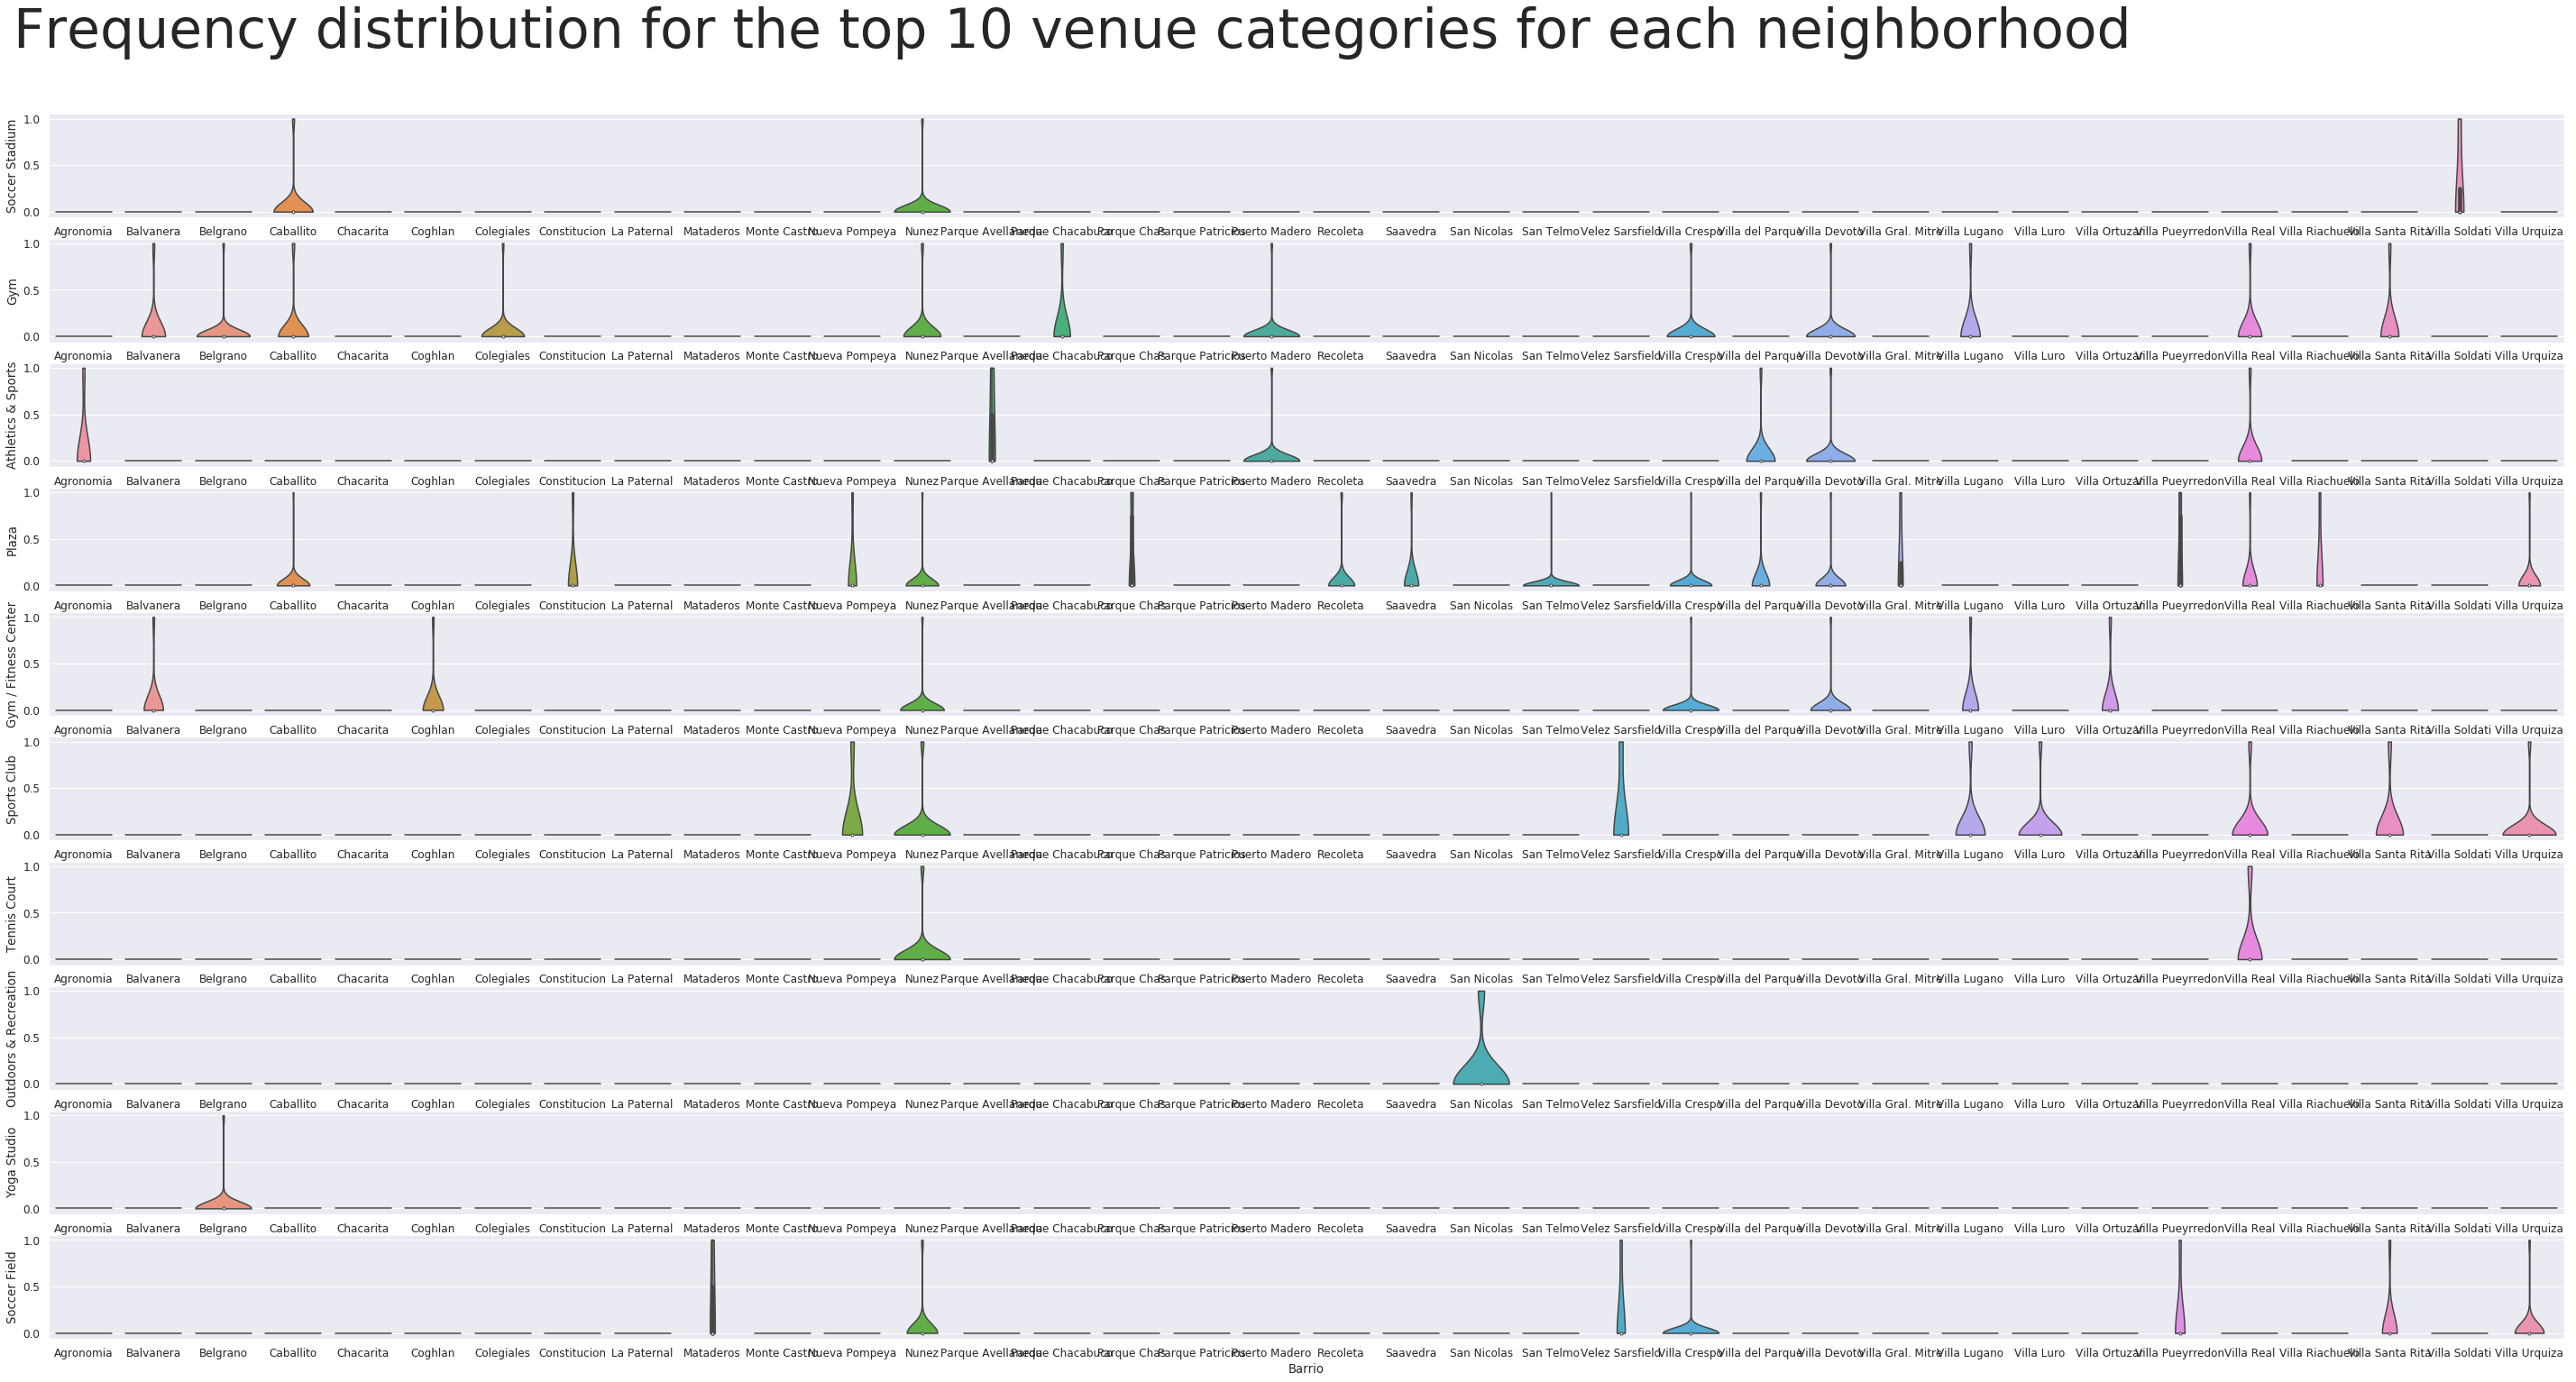

In [33]:
#Frequency distribution for the top 10 venue categories for each neighborhood

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(10,1,1)
sns.violinplot(x="Barrio", y="Soccer Stadium", data=buenos_aires_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(10,1,2)
sns.violinplot(x="Barrio", y="Gym", data=buenos_aires_onehot, cut=0);
plt.xlabel("")

plt.subplot(10,1,3)
sns.violinplot(x="Barrio", y="Athletics & Sports", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,4)
sns.violinplot(x="Barrio", y="Plaza", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,5)
sns.violinplot(x="Barrio", y="Gym / Fitness Center", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,6)
sns.violinplot(x="Barrio", y="Sports Club", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,7)
sns.violinplot(x="Barrio", y="Tennis Court", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,8)
sns.violinplot(x="Barrio", y="Outdoors & Recreation", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,9)
sns.violinplot(x="Barrio", y="Yoga Studio", data=buenos_aires_onehot, cut=0);

plt.subplot(10,1,10)
sns.violinplot(x="Barrio", y="Soccer Field", data=buenos_aires_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 10 venue categories for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_10_categories.png", dpi=240)
plt.show()

### Neighborhoods

So, as we can see in the analysis, there are 6 candidate neighborhoods, Nunez stands out, according to the criteria agreed with our client with great frequency.

They are the following:

Neighborhoods

Nunez, is the main candidate
- Villa Real
- Villa Devoto
- Caballito
- Villa Lugano
- Villa Crespo

Let's take this further with some exploration and inferential analysis

We have the 6 neighborhoods that include all the criteria of place category.
But if we include the following categories of place:

- Clothing_Store
- Sporting Goods Shop

We could make some inferences based on data and knowledge of the domain of marketing and industry, to focus the list.
That is, we should analyze whether there are other stores selling sportswear.



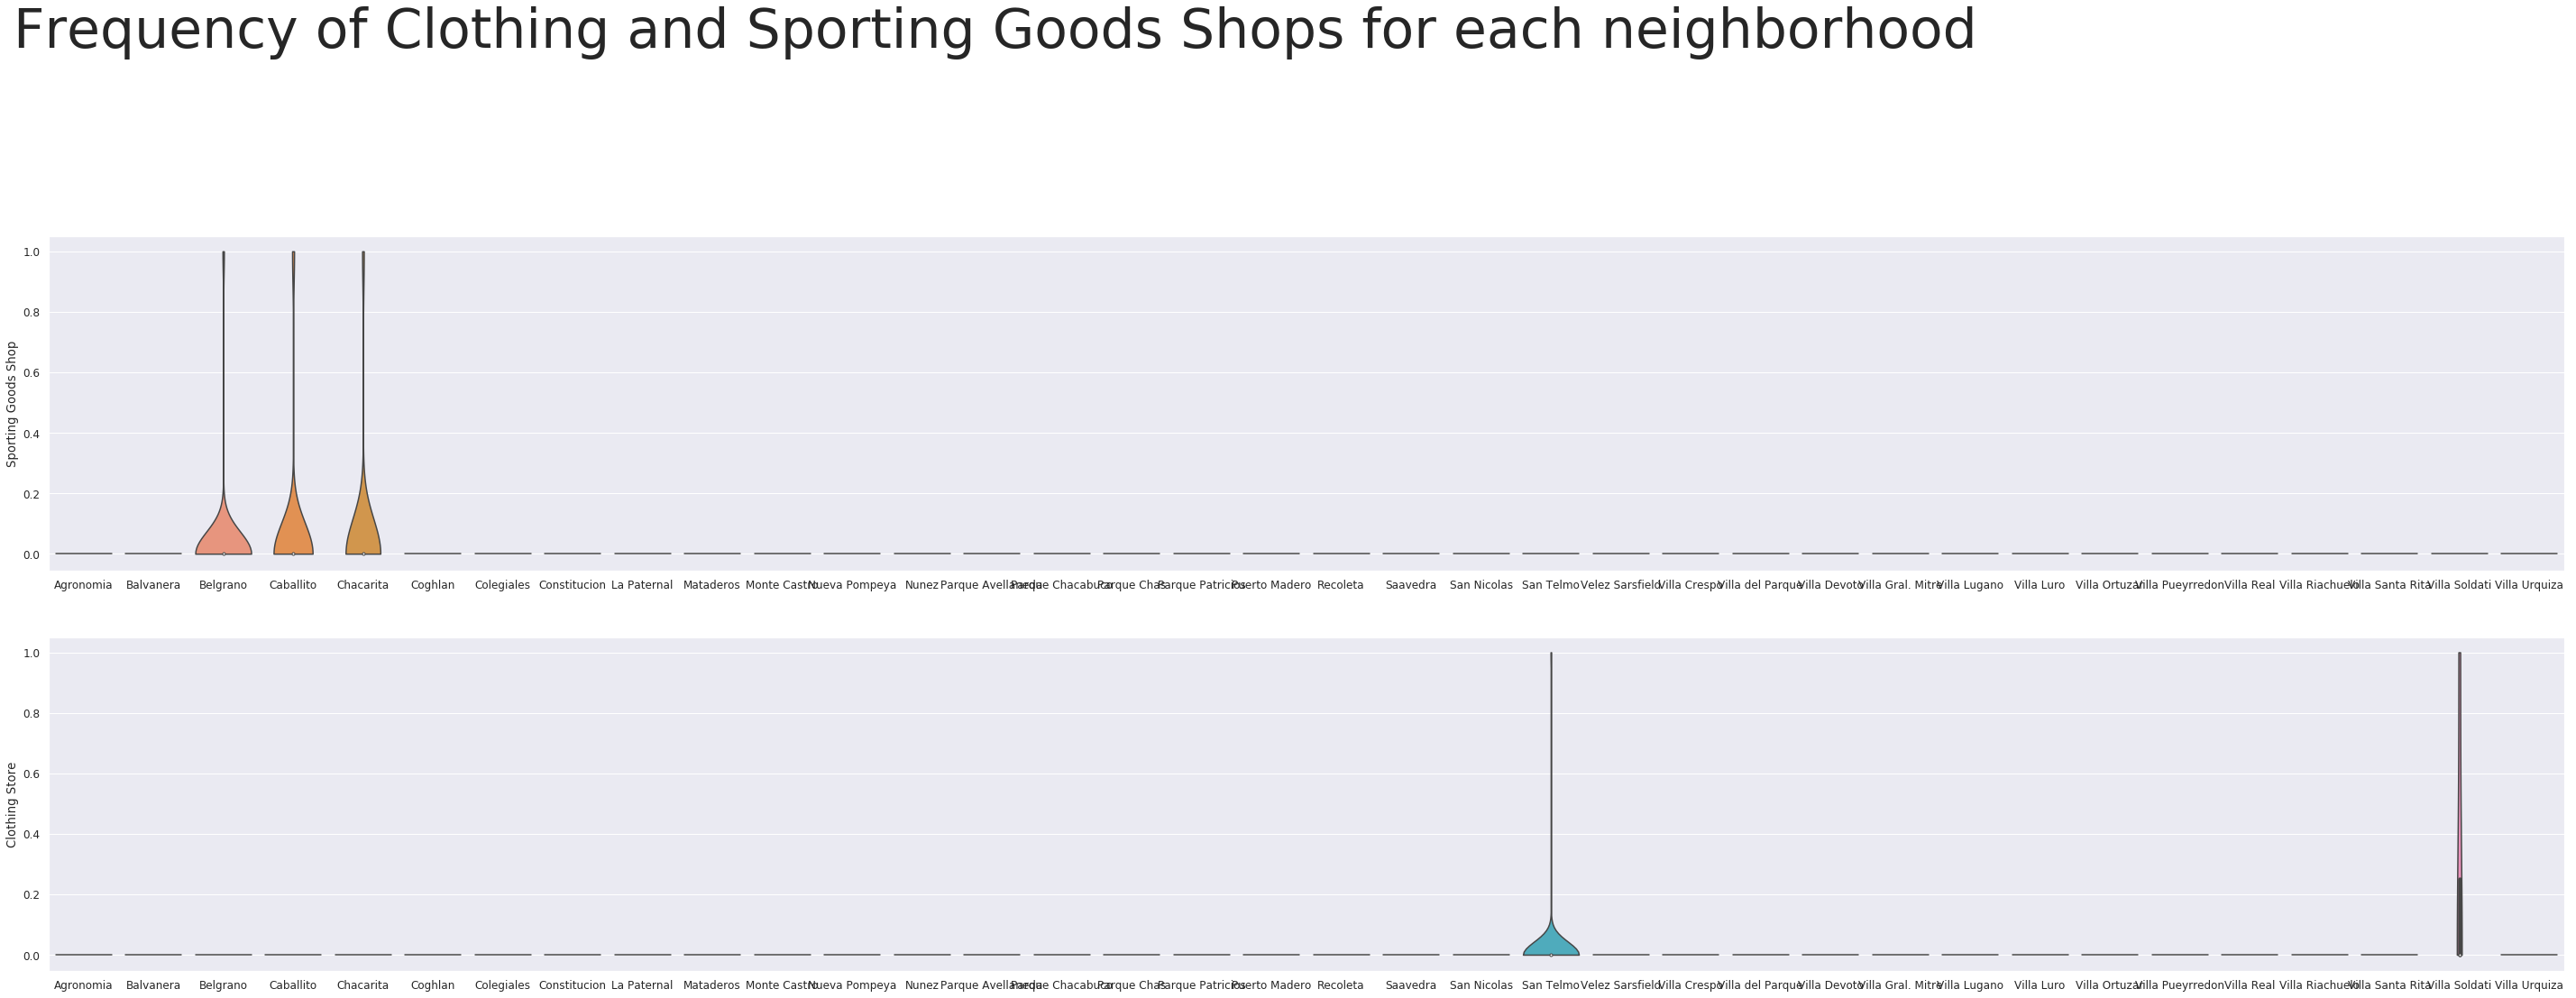

In [34]:
fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(2,1,1)
sns.violinplot(x="Barrio", y="Sporting Goods Shop", data=buenos_aires_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(2,1,2)
sns.violinplot(x="Barrio", y="Clothing Store", data=buenos_aires_onehot, cut=0);
plt.xlabel("")

ax.text(-1.0, 3.0, 'Frequency of Clothing and Sporting Goods Shops for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Sporting_Venues.png", dpi=240)

plt.show()


### Inferences and discussion

#### Chosen neighborhoods - Results

The inferential analysis that uses the data, as well as knowledge of the domain of retail and marketing, allow the list to focus on only 3 neighborhoods of the 6 selected.

The reasoning is that they have fulfilled most of the requirements presented by our client:

- Soccer stadium
- Athletics & Sports
- Fitness center
- Outdoors & Recreation
- Gym
- Square
- Sports clubs
- Tennis court
- Yoga Studio
- Social Club

Then, the 3 final candidate neighborhoods to open the new store where most of the requirements are met
They are:

- Nunez
- Villa Devoto
- Villa Real

Nunez is the one that meets most of the needs posed by our client.



In [59]:
salida = barrios[barrios.Barrio.isin(['Nunez','Villa Devoto','Villa Real'])].reset_index(drop=True)
salida.head()

,Comuna,Barrio,Latitud,Longitud
0,Comuna 13,Nunez,-34.545348,-58.462149
1,Comuna 11,Villa Devoto,-34.600994,-58.515516
2,Comuna 10,Villa Real,-34.618943,-58.525877


In [58]:
#latitude = -34.6075682  - validacion coordenadas B.A. 
#longitude = -58.4370894
map_buenos_aires = folium.Map(location=[latitud_ba, longitud_ba], zoom_start=11)

# add markers to map
for lat, lng, distrito, barrio in zip(salida['Latitud'], salida['Longitud'], salida['Comuna'], salida['Barrio']):
    
    label = '{}, {}'.format(barrio, distrito)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_buenos_aires)  
    
map_buenos_aires



In [ ]:
# Cluster Neighborhoods
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5
buenos_aires_grouped_clustering = buenos_aires_grouped.drop('Barrio', 1)
# run k-means clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(buenos_aires_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


In [ ]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels

kmeans.labels_ = kmeans.labels_.astype(int)

barrios_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

barrios_venues_sorted.head()

buenos_aires_merged = barrios


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

buenos_aires_merged = buenos_aires_merged.join(barrios_venues_sorted.set_index('Barrio'), on='Barrio')

buenos_aires_merged.head() # check the last columns!




In [ ]:
buenos_aires_merged.dropna(how='any',axis=0,inplace=True)
buenos_aires_merged.head(70)

#### Where are our chosen Neighborhoods? 
#### Let's visualise them on a map of Buenos Aires.

In [ ]:
# Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(buenos_aires_merged['Latitud'], buenos_aires_merged['Longitud'], buenos_aires_merged['Barrio'],buenos_aires_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)), parse_html=True)
    
    aux_cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[aux_cluster-1],
        fill=True,
        fill_color=rainbow[aux_cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [46]:
#Examine Clusters
#Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.
#Cluster 1
buenos_aires_merged.loc[buenos_aires_merged['Cluster Labels'] == 0, buenos_aires_merged.columns[[1] + list(range(5, buenos_aires_merged.shape[1]))]]


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Nueva Pompeya,Pizza Place,Department Store,Plaza,Sports Club,Grocery Store,Fast Food Restaurant,Dance Studio,Cupcake Shop,Cultural Center,Deli / Bodega
26,Villa Gral. Mitre,Restaurant,Nightclub,Plaza,Pizza Place,Diner,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant,Electronics Store


In [47]:
#Cluster 2
buenos_aires_merged.loc[buenos_aires_merged['Cluster Labels'] == 1, buenos_aires_merged.columns[[1] + list(range(5, buenos_aires_merged.shape[1]))]]


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agronomia,Athletics & Sports,Trail,Garden Center,Farmers Market,Bus Stop,BBQ Joint,Tunnel,Flea Market,Fast Food Restaurant,English Restaurant
13,Parque Avellaneda,Beer Garden,History Museum,Athletics & Sports,Cupcake Shop,Cultural Center,Food Service,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market
27,Villa Lugano,Bus Stop,Ice Cream Shop,Dessert Shop,Gym / Fitness Center,Bar,Pharmacy,Gym,Sports Club,Argentinian Restaurant,Dance Studio
31,Villa Real,Bus Stop,Tennis Court,History Museum,Pharmacy,Bus Station,Bakery,Athletics & Sports,Sports Club,Intersection,Gym
34,Villa Soldati,Performing Arts Venue,Bus Stop,Clothing Store,Soccer Stadium,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant


In [48]:
#Cluster 3
buenos_aires_merged.loc[buenos_aires_merged['Cluster Labels'] == 2, buenos_aires_merged.columns[[1] + list(range(5, buenos_aires_merged.shape[1]))]]


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Constitucion,Hotel,Plaza,Farmers Market,Bar,Pharmacy,Asian Restaurant,Food & Drink Shop,Harbor / Marina,Deli / Bodega,Department Store
15,Parque Chas,Plaza,Bakery,Burger Joint,Pizza Place,Grocery Store,Leather Goods Store,Café,BBQ Joint,Yoga Studio,Fast Food Restaurant
19,Saavedra,Restaurant,Bus Stop,Bakery,Bar,Plaza,Steakhouse,Ice Cream Shop,Music Venue,Pharmacy,Food Truck
30,Villa Pueyrredon,Plaza,Train Station,Ice Cream Shop,Grocery Store,Soccer Field,Diner,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant
32,Villa Riachuelo,Beer Garden,Ice Cream Shop,Video Store,Plaza,Motorcycle Shop,Electronics Store,Food Service,Food & Drink Shop,Flea Market,Fast Food Restaurant


In [49]:
#Cluster 4
buenos_aires_merged.loc[buenos_aires_merged['Cluster Labels'] == 3, buenos_aires_merged.columns[[1] + list(range(5, buenos_aires_merged.shape[1]))]]


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Balvanera,Fast Food Restaurant,Café,Hotel,BBQ Joint,Gym / Fitness Center,Gym,Metro Station,Electronics Store,Pizza Place,Restaurant
2,Belgrano,Coffee Shop,Bookstore,Argentinian Restaurant,Ice Cream Shop,Café,Vegetarian / Vegan Restaurant,Pizza Place,Tea Room,Yoga Studio,Peruvian Restaurant
3,Caballito,Café,Bakery,Pizza Place,Gym,Argentinian Restaurant,Fast Food Restaurant,Pharmacy,Restaurant,Electronics Store,Market
4,Chacarita,Pizza Place,Argentinian Restaurant,Bus Stop,Bakery,Coffee Shop,Office,Café,Sandwich Place,Farmers Market,Breakfast Spot
5,Coghlan,Café,Bakery,Pizza Place,Restaurant,Gym / Fitness Center,Brewery,Bus Stop,BBQ Joint,Argentinian Restaurant,History Museum
6,Colegiales,Pizza Place,Argentinian Restaurant,Café,Brewery,Beer Bar,Coffee Shop,Basketball Court,Radio Station,Restaurant,Sandwich Place
8,La Paternal,Diner,Performing Arts Venue,Pizza Place,Arts & Entertainment,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant,Electronics Store
10,Monte Castro,Café,Ice Cream Shop,Argentinian Restaurant,Coffee Shop,Pizza Place,Yoga Studio,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant
12,Nunez,BBQ Joint,Argentinian Restaurant,Restaurant,Gym,Soccer Field,Brewery,Sushi Restaurant,Coffee Shop,Tennis Court,Sports Club
14,Parque Chacabuco,Pharmacy,Café,Supermarket,Ice Cream Shop,Gym,Pizza Place,Bar,Yoga Studio,Eastern European Restaurant,Fast Food Restaurant


In [50]:
#Cluster 5
buenos_aires_merged.loc[buenos_aires_merged['Cluster Labels'] == 4, buenos_aires_merged.columns[[1] + list(range(5, buenos_aires_merged.shape[1]))]]


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Mataderos,Cheese Shop,Dessert Shop,Soccer Field,Yoga Studio,Eastern European Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Empanada Restaurant


#### The three selected neighborhoods share the same characteristics as they belong to the same cluster: number 3.

### Observations

The three selected neighborhoods are residential with ample spaces for sports and outdoor activities.
From this visualization, it is clear that, on a practical level, without data on which to base decisions, the number of neighborhoods to be analyzed is very large, and investigating and then visiting them all would be a daunting and slow task.

We have significantly reduced the search area to only 3 that should adapt to our client's business.

#### Inferences

We have made inferences from the data when making location recommendations, but that is exactly the point.
There is no right or wrong answer or conclusion for the task at hand.
The job of data analysis here is to run a course for the selection of new store locations
- to meet the criteria initially established by our client places where sports practices abound.
- Reduce the search to only a few of the main areas that best fit the criteria.


#### Conclusions

There are many ways in which this analysis could have been done based on different methodologies and perhaps different data sources.
The method used is a direct way to reduce the options, complying with the initial directives of our client.
The analysis and the results is not conclusive, it is a starting point that will guide the next part of the process to find the location of specific stores.
The next part will involve knowledge of the domain of the industry, and perhaps, of the city itself.
But data analysis and the resulting recommendations have greatly reduced the best data-based options and what we can infer from them.

Without taking advantage of the data to make specific decisions, the process could have been extended and resulted in the opening of a new store in
An incorrect area.
The data has helped provide a better strategy and a way forward, these data-based decisions will lead to a better solution in the end.


